In [5]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import cv2
import numpy as np
from PIL import Image
from IPython.display import display
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
png_dir_path = Path("output/assets/unfolded/png/")

png_files = list(png_dir_path.glob("*.png"))

In [39]:
from PIL.Image import Image as PILImage

def is_image_too_small(image: PILImage, min_size: int):
    return max(image.size) < min_size

  0%|          | 0/82072 [00:00<?, ?it/s]

output/assets/unfolded/png/LowPoly_Pixel_RPG_Assets_devilsworkshop_v02_LowPoly_Pixel_RPG_Assets_devilsworkshop_v02_boxGift1_0004_jpga_boxGift1_0004_jpga.png


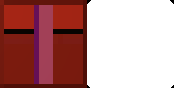

output/assets/unfolded/png/SBS_-_Tiny_Texture_Pack_3_-_Small_SBS_-_Tiny_Texture_Pack_3_-_Small_Animal_08-128x128_Animal_08-128x128.png


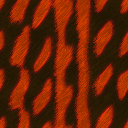

output/assets/unfolded/png/700_Pixel_Art_PNGs_700_Pixel_Art_PNGs_Wood_Planks_01_White_2_Wood_Planks_01_White_2.png


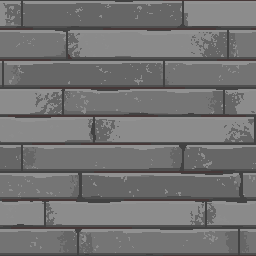

output/assets/unfolded/png/@SIEGEFAULTs_Lancer_Freebies_@SIEGEFAULTs_Lancer_Freebies_citymap_herkimerport_citymap_herkimerport.png


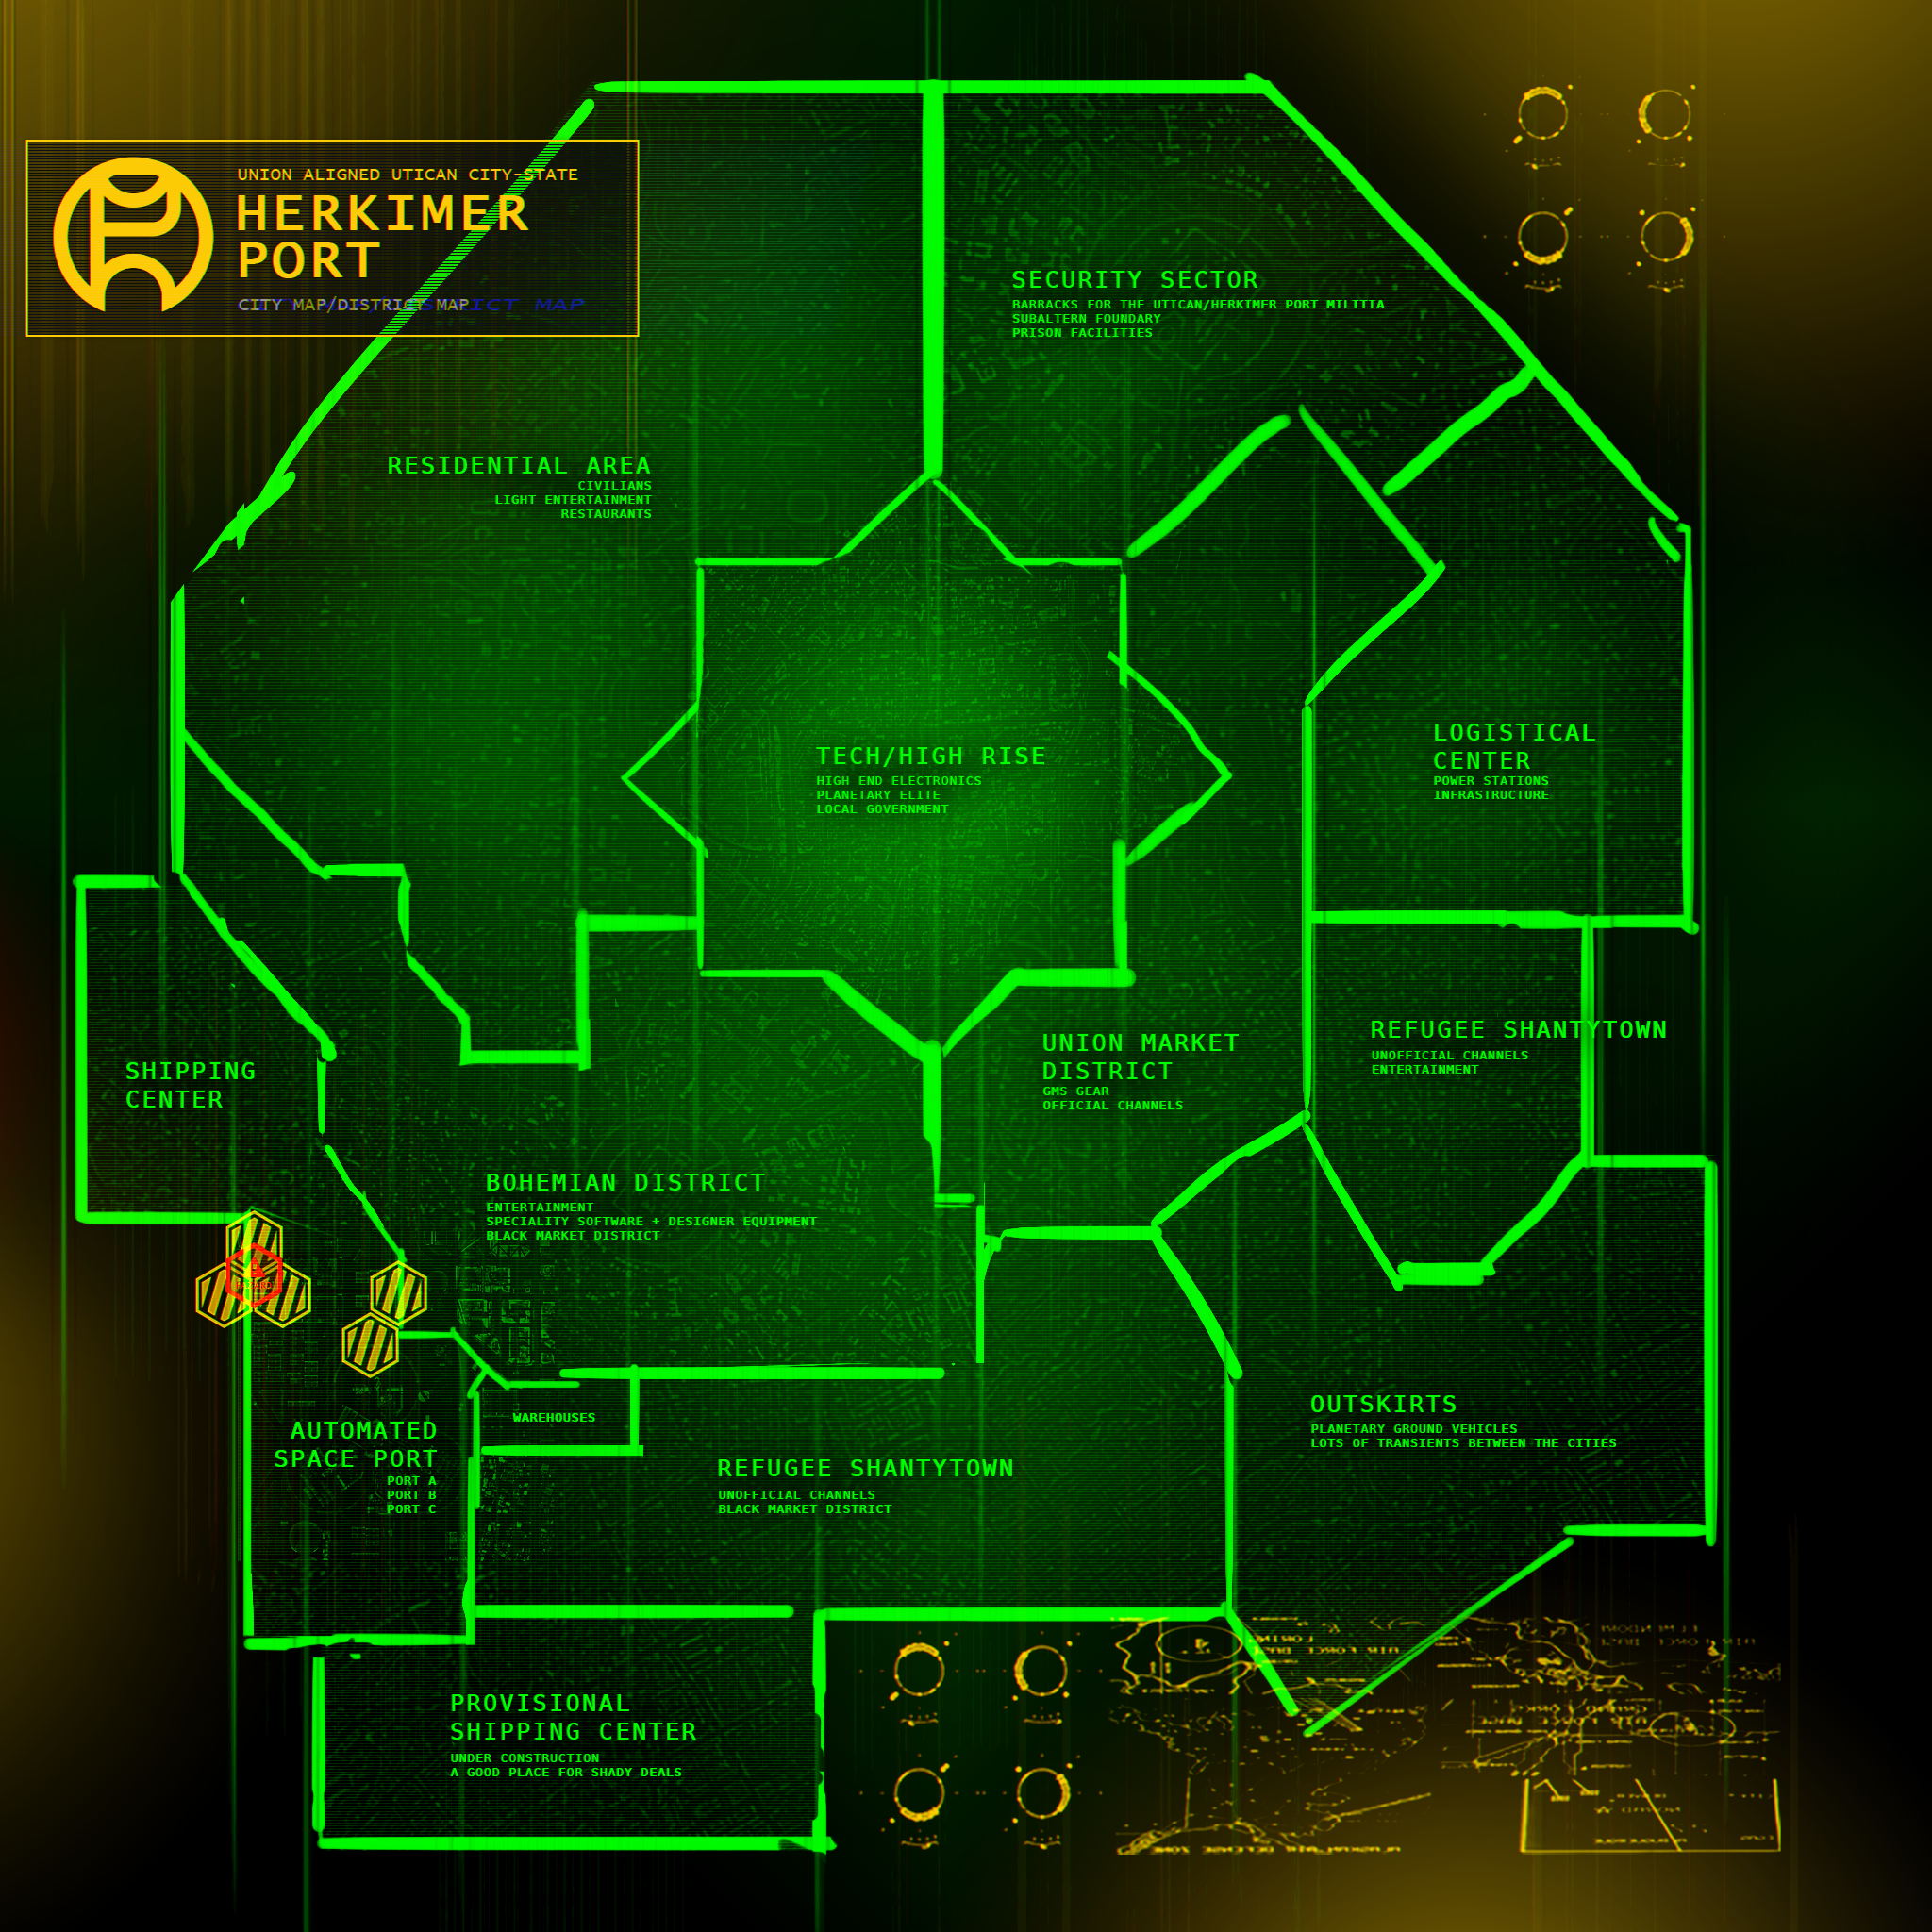

  0%|          | 90/82072 [00:00<04:37, 295.86it/s]

output/assets/unfolded/png/LowPoly_Pixel_RPG_Assets_devilsworkshop_v02_LowPoly_Pixel_RPG_Assets_devilsworkshop_v02_paintingB0005_jpga_paintingB0005_jpga.png


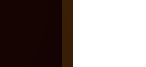

output/assets/unfolded/png/SBS_-_Circular_Texture_Pack_-_128x128_SBS_-_Circular_Texture_Pack_-_128x128_Square_Tile_20-128x128_Square_Tile_20-128x128.png


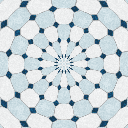

output/assets/unfolded/png/SBS_-_Tiny_Texture_Pack_2_-_128x128_SBS_-_Tiny_Texture_Pack_2_-_128x128_Brick_05-128x128_Brick_05-128x128.png


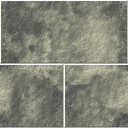

output/assets/unfolded/png/700_Pixel_Art_PNGs_700_Pixel_Art_PNGs_Tiles_Small_Mix_1_Tiles_Small_Mix_1.png


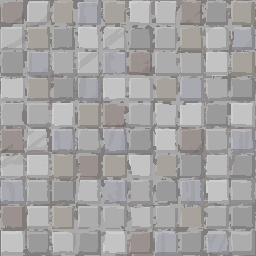

output/assets/unfolded/png/LowPoly_Pixel_RPG_Assets_devilsworkshop_v02_LowPoly_Pixel_RPG_Assets_devilsworkshop_v02_paintingB0006_jpga_paintingB0006_jpga.png


output/assets/unfolded/png/SBS_-_Tiny_Texture_Pack_3_-_Small_SBS_-_Tiny_Texture_Pack_3_-_Small_Terrain_05-128x128_Terrain_05-128x128.png


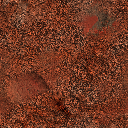

output/assets/unfolded/png/Medieval_Castle_Asset_Pack_Medieval_Castle_Asset_Pack_lion_column_9_lion_column_9.png


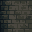

  0%|          | 200/82072 [00:00<02:17, 596.84it/s]


In [55]:
from PIL import UnidentifiedImageError
from tqdm import tqdm


imgs_data = []

count = 0
for im_path in tqdm(pd.Series(png_files).sample(frac=1)):
    try:
        im = Image.open(im_path)
        if im.mode == "RGB":
            print(im_path)
            display(im)
            count += 1
        if count > 10:
            break
        imgs_data.append((im_path, im.size, im.mode))
    except UnidentifiedImageError:
        continue
    # im = im.convert("RGBA")
    # display(im)


<Axes: title={'center': 'Image Size Distribution'}, xlabel='width', ylabel='height'>

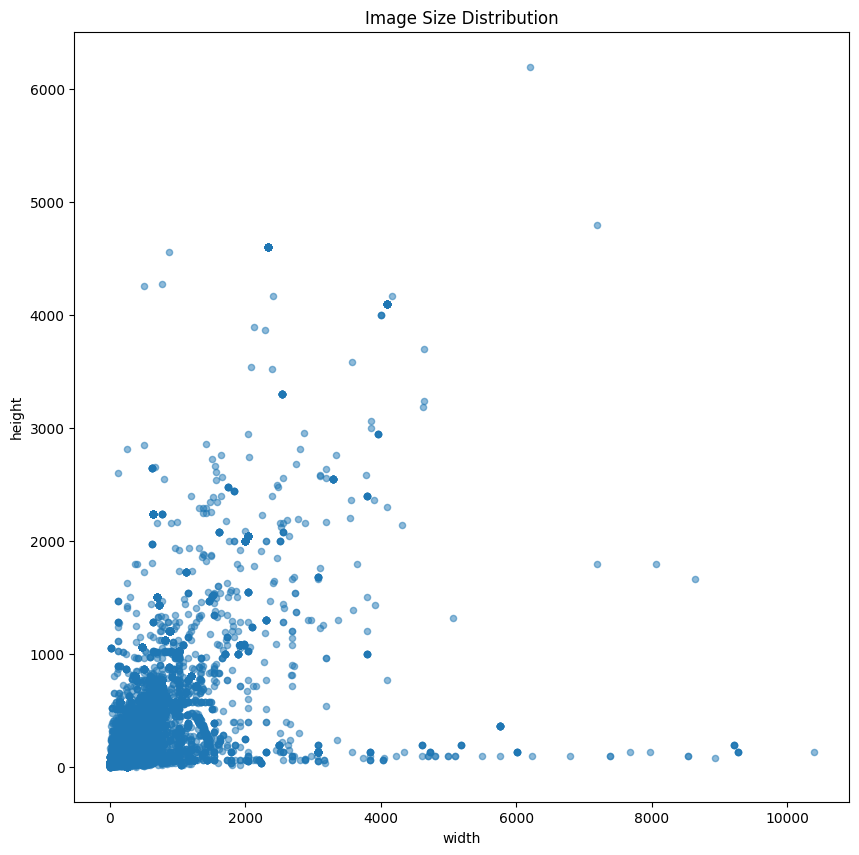

In [43]:
df = pd.DataFrame(imgs_data, columns=["path", "size", "mode"])
df["width"] = df["size"].apply(lambda x: x[0])
df["height"] = df["size"].apply(lambda x: x[1])

df.plot.scatter(
    x="width",
    y="height",
    title="Image Size Distribution",
    figsize=(10, 10),
    alpha=0.5,
)